## Image Filtering: Denoising images

In [131]:
import cv2
from skimage.util import random_noise
import matplotlib.pyplot as plt
import numpy as np

### <spans style=color:green> Plotting function </span>

In [132]:
def plotting(filtered_images: tuple, noising_type: int=0) -> None:
    """ Plotting Filtered Images """

    # set figure with many subplot
    fig, axes = plt.subplots(1, len(filtered_images), figsize=(15, 5))
    
    # set title
    if noising_type == 0:
        noising_image = titles = ["Gaussian Noise", "Mean 3X3", "Gaussian 3X3", "Bilateral 3X3",  "Median 3X3"]
    elif noising_type == 1:
        noising_image = titles = ["Salt&Pepper noise", "Mean 3X3", "Gaussian 3X3", "Bilateral 3X3",  "Median 3X3"]
    else:
        raise ValueError("Invalid noise type specified. Use 0 for Gaussian noise, 1 for salt and pepper noise.")
    

    # Loop through images and display them in subgraphs
    for i, image in enumerate(filtered_images):
        axes[i].imshow(image, cmap='gray')  # plotting image
        axes[i].set_title(titles[i])
        axes[i].axis('off')  # hide axes

    # plotting the figure
    #plt.savefig("sel")
    plt.show()

### <span style=color:green> Filtering <span>

In [133]:
def filtering(image_name: str, noising_type: int=0) -> tuple:
    """Returns an image filtered with various filters"""

    # Reading image and adding noise
    image = cv2.imread(image_name, cv2.IMREAD_UNCHANGED)

    # Reading checking
    if image is None:
        raise ValueError(f"Error: image could not be read. Check file path: {image_name}")

    # Add Gaussian noise
    gaussian_noise = random_noise(image, 'gaussian', mean=0, var=0.09)
    gaussian_noise = np.array(255 * gaussian_noise, dtype=np.uint8)

    # Add salt an pepper noise
    salt_and_paper_noise = random_noise(image,'s&p', amount=0.1)
    salt_and_paper_noise = np.array(255 * salt_and_paper_noise, dtype=np.uint8)

    if noising_type == 0:
        noising_image = gaussian_noise
    elif noising_type == 1:
        noising_image = salt_and_paper_noise
    else:
        raise ValueError("Invalid noise type specified. Use 0 for Gaussian noise, 1 for salt and pepper noise.") 

                
    # Denoising begining    
    median_blur = cv2.medianBlur(noising_image, ksize=3)
    mean_blur = cv2.blur(noising_image, (3,3), 	borderType=cv2.BORDER_DEFAULT )
    gaussian_blur = cv2.GaussianBlur(noising_image, (3,3), sigmaX=0, sigmaY=0, borderType=cv2.BORDER_DEFAULT)
    bilateral_blur= cv2.bilateralFilter(noising_image, 3, sigmaColor=20, sigmaSpace=100, borderType=cv2.BORDER_DEFAULT)

    return noising_image, mean_blur, gaussian_blur, bilateral_blur, median_blur,
    
    


### <span style=color:green> Calling functions </span>

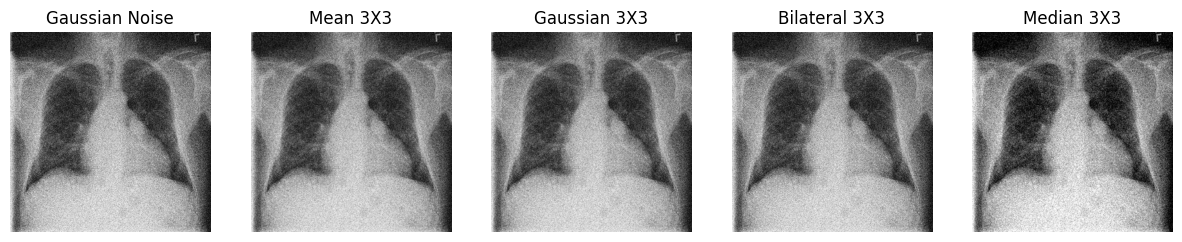

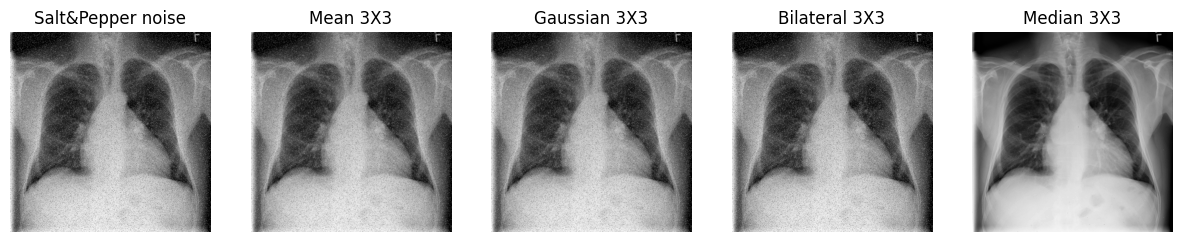

In [134]:
image_path = "Images/thorax_xray.png"
filtered = filtering(image_path, 0)
plotting(filtered, 0)
filtered = filtering(image_path, 1)
plotting(filtered, 1)